# Andrew Kang

## Research question/interests

It is quite a common sense that any fire incidence should be treated as early as possible. However, in many cases due to varies reason a wildfire may not be discovered or treated at its earliest stage.  In my own prediction, if there are a massive number of fires happening in a relatively short period time, the fire department will be exhausted and overwhelmed, which will be unable to responds to some of the fire right away(after the fire was discovered). In the data set, this prediction should appear in the data set as when the number of fire in each month goes up, the average amount of area burned by each fire ((total area burned)/(number of fire) in the same month) would also goes up. If this prediction happen to be true, then it would means that the fire department need more crew, and the corresponding solution would be hire more crew in order to put down the fire quicker.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import project_functions3 as pf



area_burned_by_month = pd.read_csv("../data/raw/NFD-Area_burned_by_month-ENFR.csv", encoding="latin")

number_of_fires_by_month = pd.read_csv("../data/raw/NFD-Number_of_fires_by_month-ENFR.csv", encoding="latin")

## Task1

Number of rows and columns for are_burned_by_month:  (2919, 11)
Number of rows and columns for number_of_fires_by_month:  (2919, 11)


,ï»¿Year,AnnÃe,ISO,Jurisdiction,Juridiction,Month,Mois,Area (hectares),Data Qualifier,Superficie (en hectare),Qualificatifs de donnÃes
0,1990,1990,AB,Alberta,Alberta,January,Janvier,0.1,a,0.1,a
1,1990,1990,AB,Alberta,Alberta,October,Octobre,182.4,a,182.4,a
2,1990,1990,AB,Alberta,Alberta,November,Novembre,42.5,a,42.5,a
3,1990,1990,AB,Alberta,Alberta,December,DÃcembre,0.4,a,0.4,a
4,1990,1990,AB,Alberta,Alberta,February,FÃvrier,3.3,a,3.3,a


,ï»¿Year,AnnÃe,ISO,Jurisdiction,Juridiction,Month,Mois,Number,Data Qualifier,Nombre,Qualificatifs de donnÃes
0,1990,1990,AB,Alberta,Alberta,January,Janvier,1,a,1,a
1,1990,1990,AB,Alberta,Alberta,October,Octobre,34,a,34,a
2,1990,1990,AB,Alberta,Alberta,November,Novembre,16,a,16,a
3,1990,1990,AB,Alberta,Alberta,December,DÃcembre,4,a,4,a
4,1990,1990,AB,Alberta,Alberta,February,FÃvrier,5,a,5,a


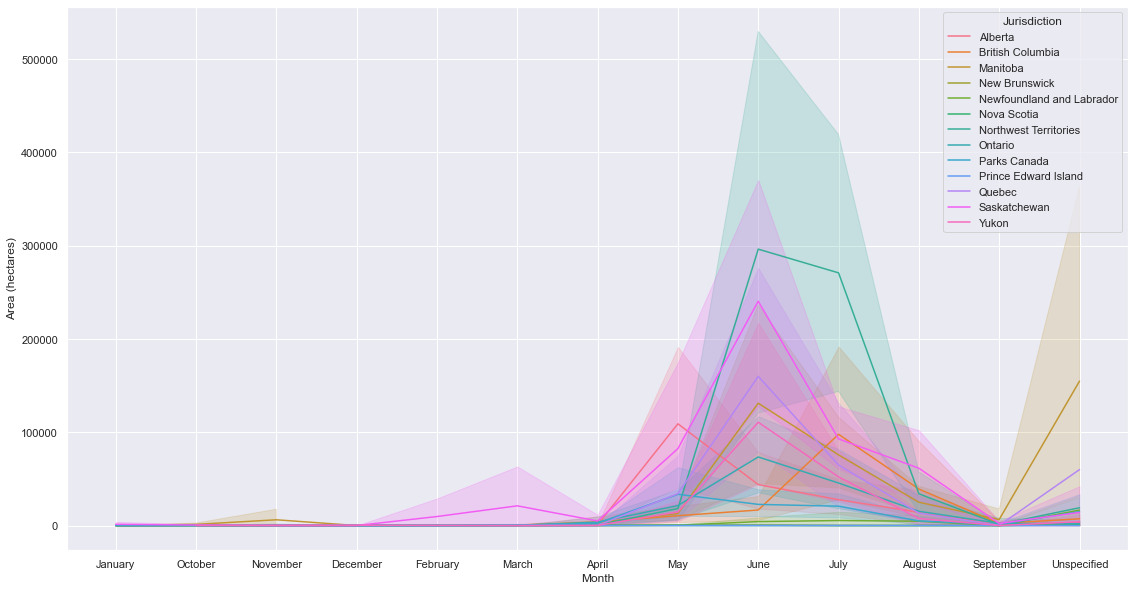

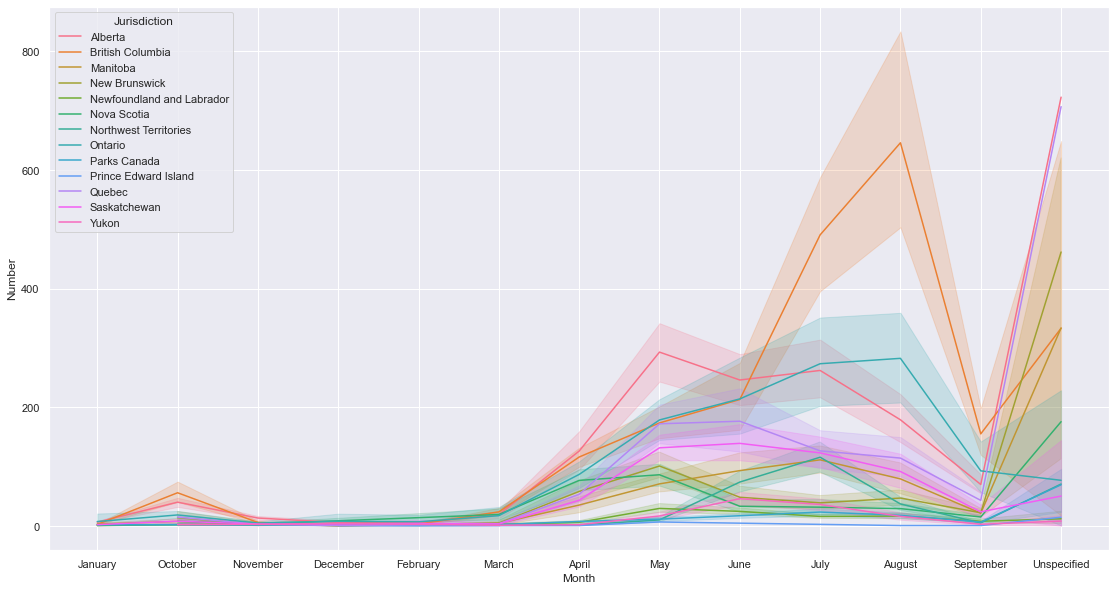

In [12]:
print("Number of rows and columns for are_burned_by_month: ", area_burned_by_month.shape)
print("Number of rows and columns for number_of_fires_by_month: ", area_burned_by_month.shape)

display(area_burned_by_month.head())
display(number_of_fires_by_month.head())


sns.set(style = "darkgrid")
plt.figure(figsize=(19,10))
sns.lineplot(x="Month", y="Area (hectares)", hue="Jurisdiction", data = area_burned_by_month)
plt.show()
plt.figure(figsize=(19,10))
sns.lineplot(x="Month", y="Number", hue="Jurisdiction", data = number_of_fires_by_month)
plt.show()

# Observations

### Both numbers of fires per month and areas per month are high between April and september. Although the x axis in the graph isn't sorted. 

## Cleaning data

In [47]:

pf.assign_index_to_month(area_burned_by_month)


AttributeError: module 'project_functions3' has no attribute 'assign_index_to_month'

In [42]:

area_burned_by_month = pf.removeColumnsByIndex(area_burned_by_month, [1,2,4,6,8,9,10])
number_of_fires_by_month= pf.removeColumnsByIndex(number_of_fires_by_month, [1,2,4,6,8,9,10])    
display(area_burned_by_month)
display(number_of_fires_by_month)



,ï»¿Year,Jurisdiction,Month,Area (hectares)
0,1990,Alberta,January,0.1
1,1990,Alberta,October,182.4
2,1990,Alberta,November,42.5
3,1990,Alberta,December,0.4
4,1990,Alberta,February,3.3
...,...,...,...,...
2914,2020,Newfoundland and Labrador,Unspecified,4178.0
2915,2020,New Brunswick,Unspecified,1388.0
2916,2020,Nova Scotia,Unspecified,709.0
2917,2020,Prince Edward Island,Unspecified,13.0


,ï»¿Year,Jurisdiction,Month,Number
0,1990,Alberta,January,1
1,1990,Alberta,October,34
2,1990,Alberta,November,16
3,1990,Alberta,December,4
4,1990,Alberta,February,5
...,...,...,...,...
2914,2020,Newfoundland and Labrador,Unspecified,94
2915,2020,New Brunswick,Unspecified,462
2916,2020,Nova Scotia,Unspecified,176
2917,2020,Prince Edward Island,Unspecified,15


In [4]:
new=pd.merge(area_burned_by_month,number_of_fires_by_month,how="inner")
display(new)

,ï»¿Year,Jurisdiction,Month,Area (hectares),Number
0,1990,Alberta,January,0.1,1
1,1990,Alberta,October,182.4,34
2,1990,Alberta,November,42.5,16
3,1990,Alberta,December,0.4,4
4,1990,Alberta,February,3.3,5
...,...,...,...,...,...
2914,2020,Newfoundland and Labrador,Unspecified,4178.0,94
2915,2020,New Brunswick,Unspecified,1388.0,462
2916,2020,Nova Scotia,Unspecified,709.0,176
2917,2020,Prince Edward Island,Unspecified,13.0,15


In [5]:
new["area per fire"]=new["Area (hectares)"]/new["Number"]
new


,ï»¿Year,Jurisdiction,Month,Area (hectares),Number,area per fire
0,1990,Alberta,January,0.1,1,0.100000
1,1990,Alberta,October,182.4,34,5.364706
2,1990,Alberta,November,42.5,16,2.656250
3,1990,Alberta,December,0.4,4,0.100000
4,1990,Alberta,February,3.3,5,0.660000
...,...,...,...,...,...,...
2914,2020,Newfoundland and Labrador,Unspecified,4178.0,94,44.446809
2915,2020,New Brunswick,Unspecified,1388.0,462,3.004329
2916,2020,Nova Scotia,Unspecified,709.0,176,4.028409
2917,2020,Prince Edward Island,Unspecified,13.0,15,0.866667
